---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Applied Machine Learning: Module 2 (Supervised Learning, Part I)

## Preamble and Review

In [ ]:
'''
the label is an example of a target value. So in classification, the target value is label of an object and then regression, 

it's the particular continuous value you might want to protect from the inputs. 


You'll be hearing a lot about models in this course. What is a model? Well, it's a specific mathematical or computational description that expresses the relationship between a set of input variables and one or more outcome variables that are being studied or predicted. 
In statistical terms the input variables are called independent variables and the outcome variables are termed dependent variables. 
In Machine Learning we use the term features to refer to the input, or independent variables. And target value or target label to refer to the output, dependent variables. 
Models can be either used to understand and explore the structure within a given dataset, as we'll see in unsupervised learning. 





'''

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


fruits = pd.read_table('readonly/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

FileNotFoundError: [Errno 2] File readonly/fruit_data_with_colors.txt does not exist: 'readonly/fruit_data_with_colors.txt'

## Datasets

<IPython.core.display.Javascript object>


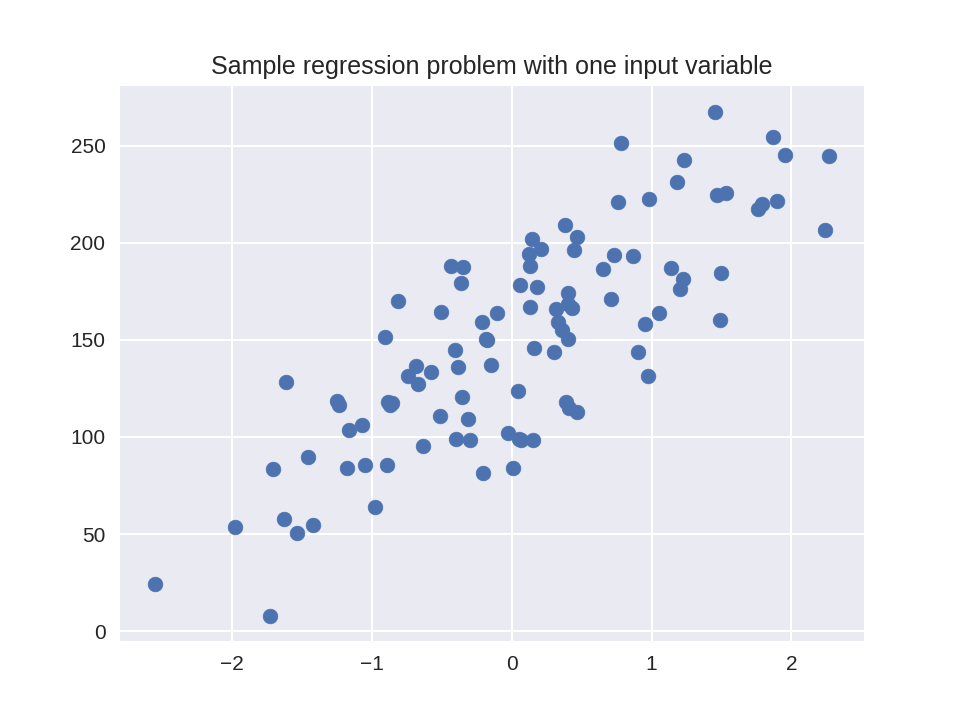

<IPython.core.display.Javascript object>


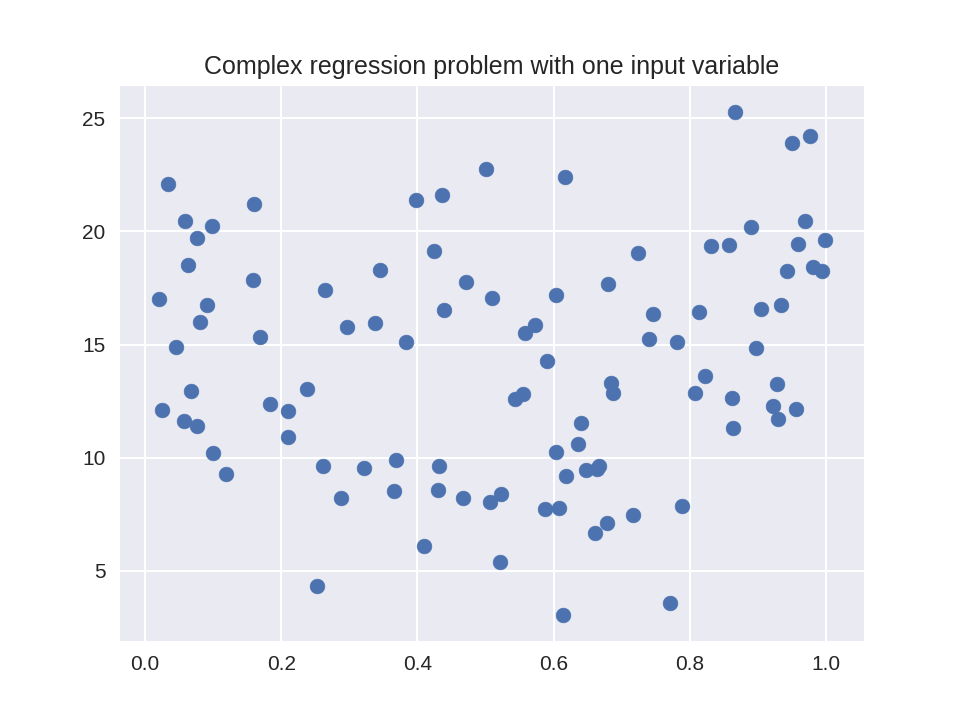

<IPython.core.display.Javascript object>


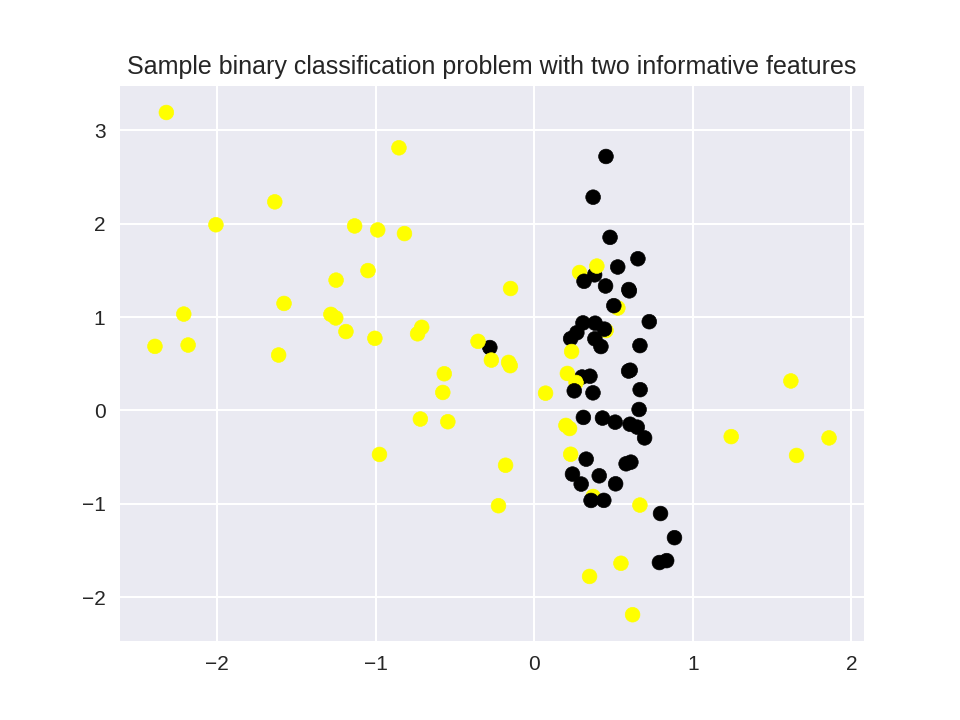

<IPython.core.display.Javascript object>


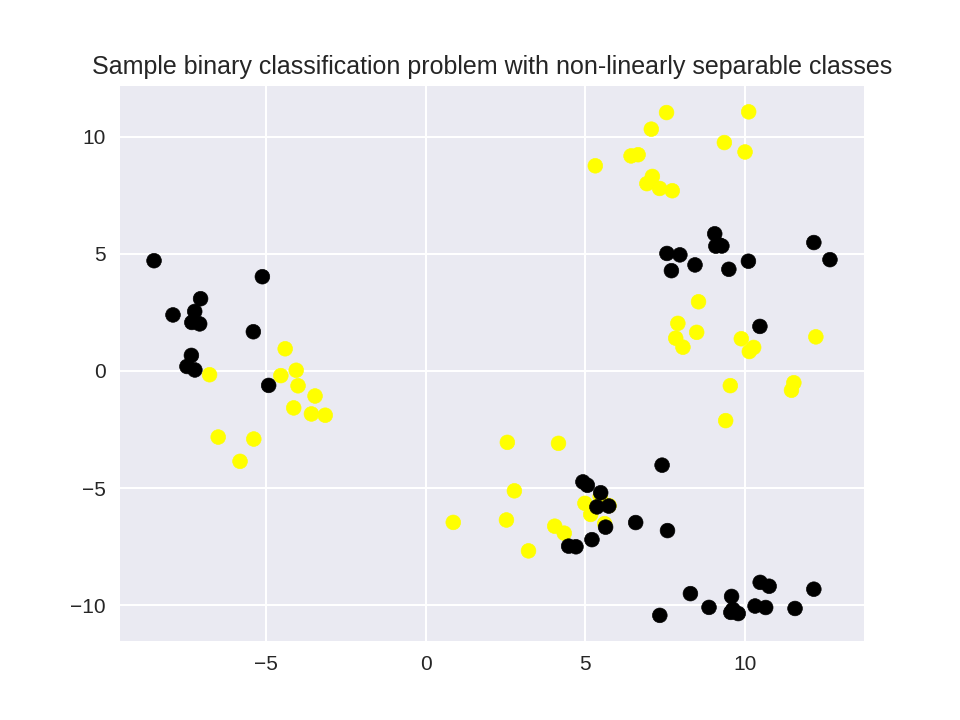

'\n#https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized\n#use this if require\nimport csv\n\nf = open("C:/Users/hp/coursera/Applied Machine Learning in Python/Module 2 Supervised Machine Learning/CommViolPredUnnormalizedData.txt", \'r\')\nreader = csv.reader(f) \nss = pd.DataFrame(reader)\n\nprint(ss)\n\n'

In [10]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
'''

We'll also look at a more complex binary classification problem that uses two features. But where the two classes are not really linearly separable, instead forming into various clusters in different parts of the feature space. 
This dataset was created in two steps. First using the make_blobs function in SK learn datasets to randomly generate 100 samples in 8 different clusters. And then by changing the cluster label assigned by make_blobs, which is a number from 1 to 8, to a binary number by converting it using a modulo 2 function. Assigning the even index points to class 0 and odd index points to class 1.
To illustrate multi-class classification, we'll use our familiar fruits dataset, which, as you may remember has four features and four possible target labels. 

Here on the left, I'm showing the array of scatter plots that we saw in week one that shows the relationship between all possible pairs of features and the class labels, with the distribution of values for each feature along the diagonal. 
'''
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()
'''
#https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized
#use this if require
import csv

f = open("C:/Users/hp/coursera/Applied Machine Learning in Python/Module 2 Supervised Machine Learning/CommViolPredUnnormalizedData.txt", 'r')
reader = csv.reader(f) 
ss = pd.DataFrame(reader)

print(ss)

'''

## K-Nearest Neighbors

### Classification

<IPython.core.display.Javascript object>


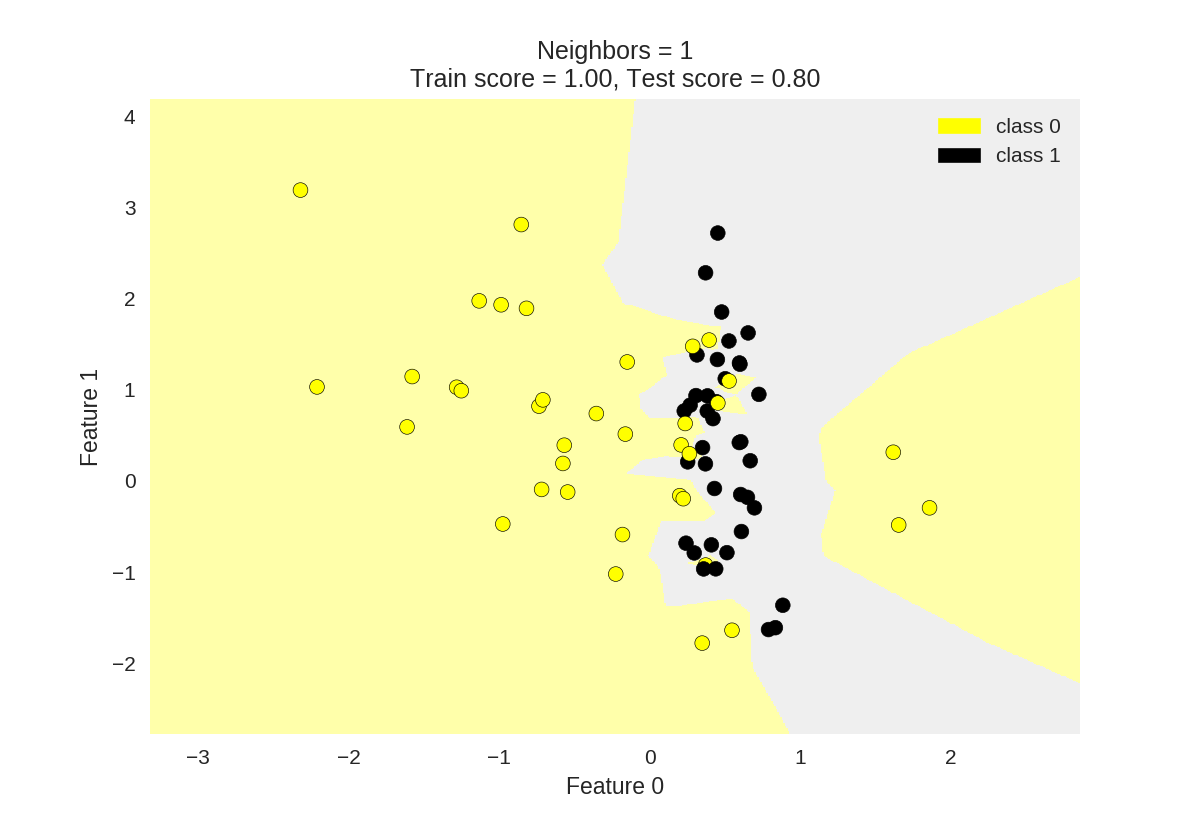

<IPython.core.display.Javascript object>


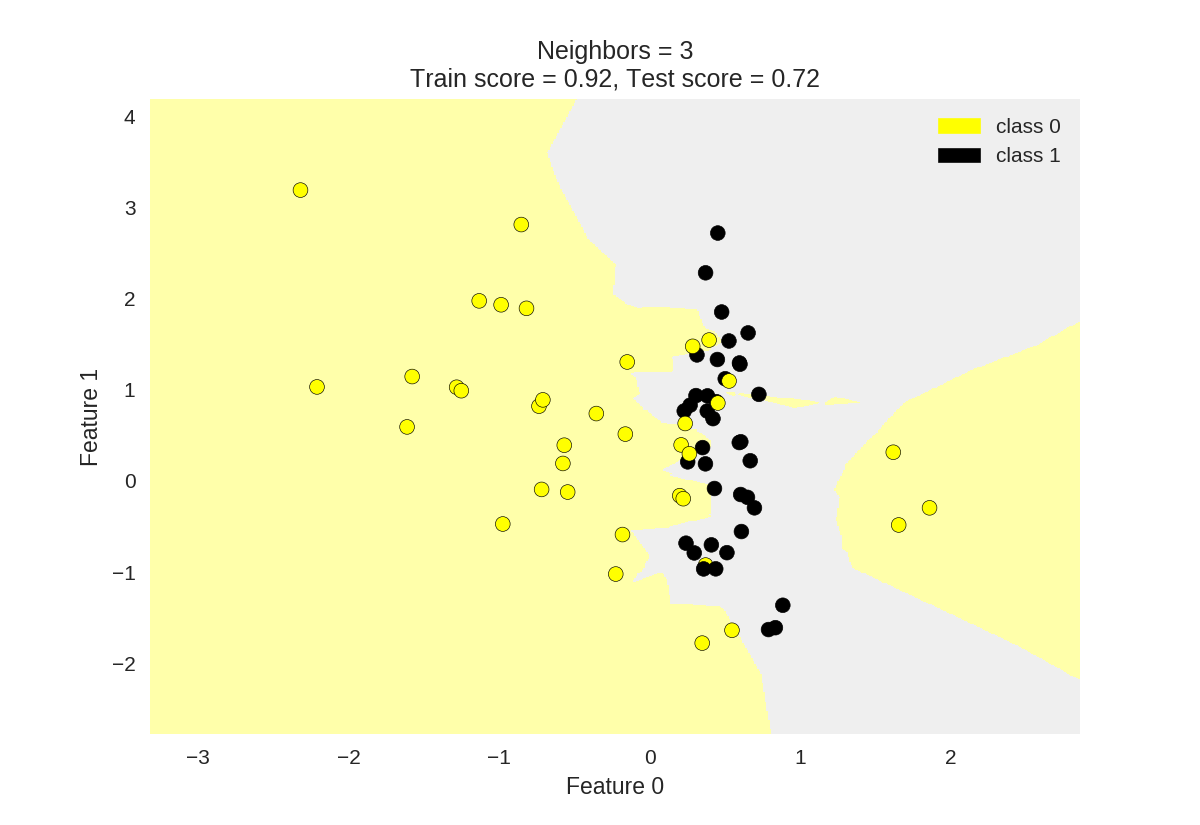

<IPython.core.display.Javascript object>


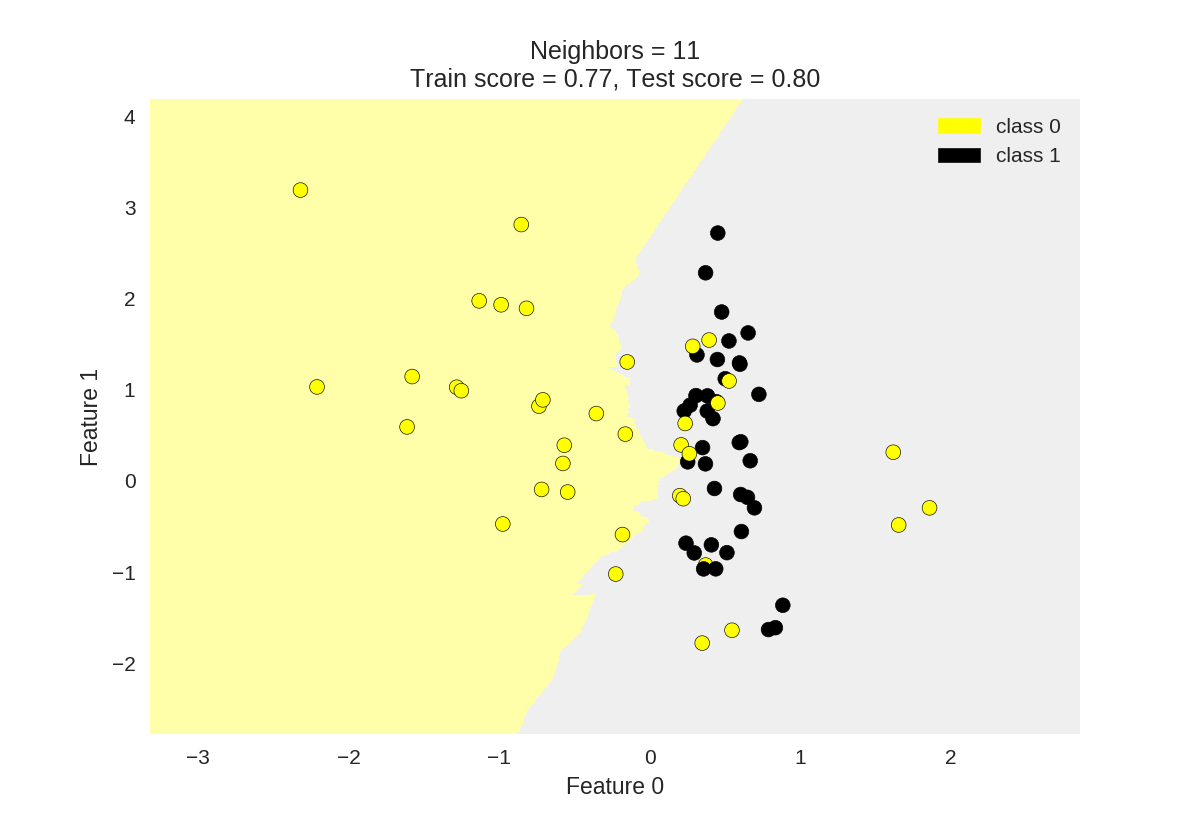

In [3]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)
'''
The code for this example in the notebook uses a special function, in the shared utilities library for this course, called plot_two_class_knn. If you run this code and compare the resulting training and test scores for k equals 1, 3, and 11, which are shown in the title of each plot, you can see the effect of model complexity on a models ability to generalize. 
'''

### Regression

In [ ]:
'''
On the other hand, if the target is a real value quantity like cost, or income, or height then it can be treated as a regression problem. 

'''

In [11]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)
print(X_test,y_test)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[[ 1.95]
 [-0.39]
 [ 0.4 ]
 [ 0.4 ]
 [-1.63]
 [ 0.16]
 [-0.18]
 [ 1.49]
 [ 1.14]
 [-1.17]
 [ 0.9 ]
 [-0.63]
 [ 1.49]
 [-0.4 ]
 [ 0.43]
 [-0.9 ]
 [-0.44]
 [ 0.76]
 [ 0.38]
 [ 0.21]
 [ 2.24]
 [ 1.2 ]
 [-0.81]
 [-0.74]
 [-0.21]] [ 245.1   136.06  150.56  174.29   57.58  145.7   149.87  184.41  186.77
  103.44  143.6    95.27  160.22   99.06  166.52   85.72  187.93  221.
  209.37  196.7   206.67  176.42  169.91  131.6    81.58]
[ 231.71  148.36  150.59  150.59   72.15  166.51  141.91  235.57  208.26
  102.1   191.32  134.5   228.32  148.36  159.17  113.47  144.04  199.23
  143.19  166.51  231.71  208.26  128.02  123.14  141.91]
R-squared test score: 0.425


<IPython.core.display.Javascript object>


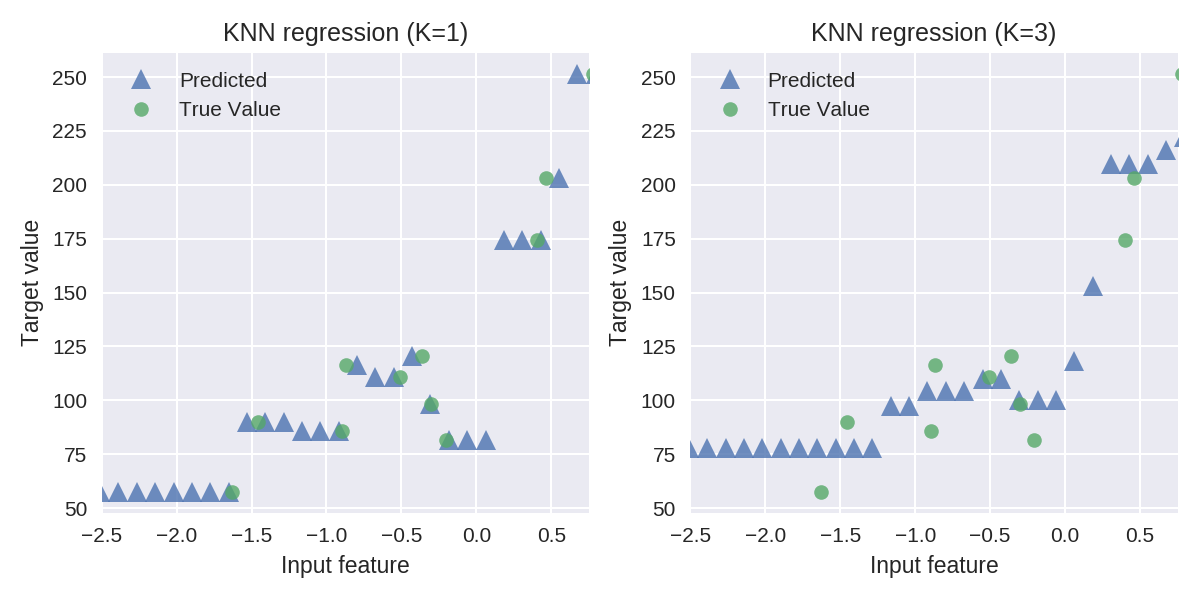

In [12]:


fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

### Regression model complexity as a function of K

<IPython.core.display.Javascript object>


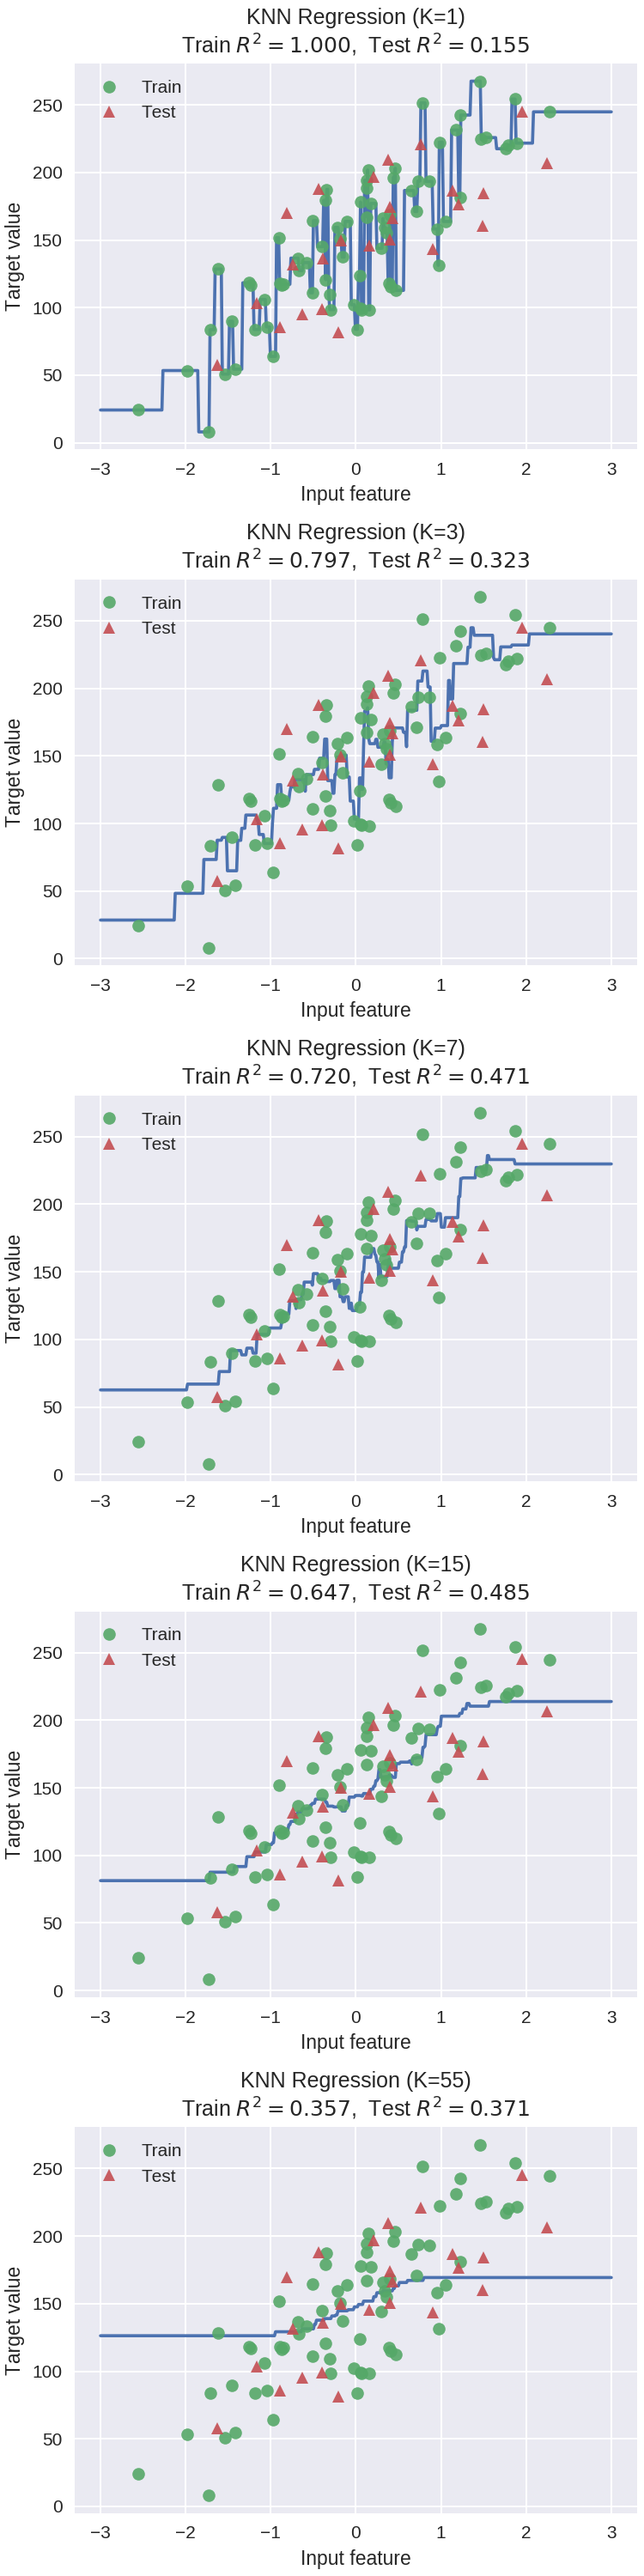

"\n\nThe pro's of the nearest neighbor approach are that it's simple and easy to understand why a particular prediction is made. \n\nA k-nearest neighbor approach can be a reasonable baseline against what you can compare more sophisticated methods. \n\nWhen the training data has many instances, or each instance has lots of features, this can really slow down the performance of a k-nearest neighbors model. So in general, if your data set has hundreds or thousands of features, you should consider alternatives to k-nearest neighbors models, especially if your data is sparse. Meaning that each instance has lots of features, but most of them are zero. \n\nSo to sum up, and as a review of what we saw in week one. The two key parameters for both regression and classification in nearest neighbors models are naturally n-neighbors which controls the value of the number of neighbors to consider and thus the model complexity, as we saw. \n\nAnd the metric parameter which controls the distance func

In [13]:
'''
Just as we did for classification, let's look at the connection between model complexity and generalization ability as measured by the r-squared training and test values on the simple regression dataset. The series of plots on the notebook shows how the KNN regression algorithm fits the data for k = 1, 3, 7, 15, and in an extreme case of k = 55. It represents almost half the training points. We can see the same pattern in model complexity for k and N regression that we saw for k and N classification. Namely, that small values of k give models with higher complexity. And large values of k result in simpler models with lower complexity. 
Starting on the left when k = 1, the regression model fits the training data perfectly with a r-squared score of 1.0. But it's very bad at predicting the target values for new data samples, as reflected in the r-squared test score of only 0.155. 

As the value of k increases, which we can see acts to smooth out these local variations to capture more of the global trend. 
Again the training set score drops, but the model gets better at generalizing to new data and the test score goes up as K increases. 
Finally in this series, the model with k = 15 has the best test set performance, with an r-squared score of 0.485. Increasing k much further however to k = 55, results in both the training and test set scores dropping back down to lower levels, as the model now starts to under-fit. In other words, it's too simple to do well, even on the training data. 


'''


# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    
    
'''

The pro's of the nearest neighbor approach are that it's simple and easy to understand why a particular prediction is made. 

A k-nearest neighbor approach can be a reasonable baseline against what you can compare more sophisticated methods. 

When the training data has many instances, or each instance has lots of features, this can really slow down the performance of a k-nearest neighbors model. So in general, if your data set has hundreds or thousands of features, you should consider alternatives to k-nearest neighbors models, especially if your data is sparse. Meaning that each instance has lots of features, but most of them are zero. 

So to sum up, and as a review of what we saw in week one. The two key parameters for both regression and classification in nearest neighbors models are naturally n-neighbors which controls the value of the number of neighbors to consider and thus the model complexity, as we saw. 

And the metric parameter which controls the distance function between points and thus which points are considered as nearest in finding neighbors. 

'''


## Linear models for regression

In [ ]:
'''
 linear models make strong assumptions about the structure of the data. In other words, that the target value can be predicted just using a weighted sum of the input variables, a linear function. 

It can get stable, but potentially inaccurate predictions. 

'''

### Linear regression

In [14]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 45.71]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


### Linear regression: example plot 

<IPython.core.display.Javascript object>


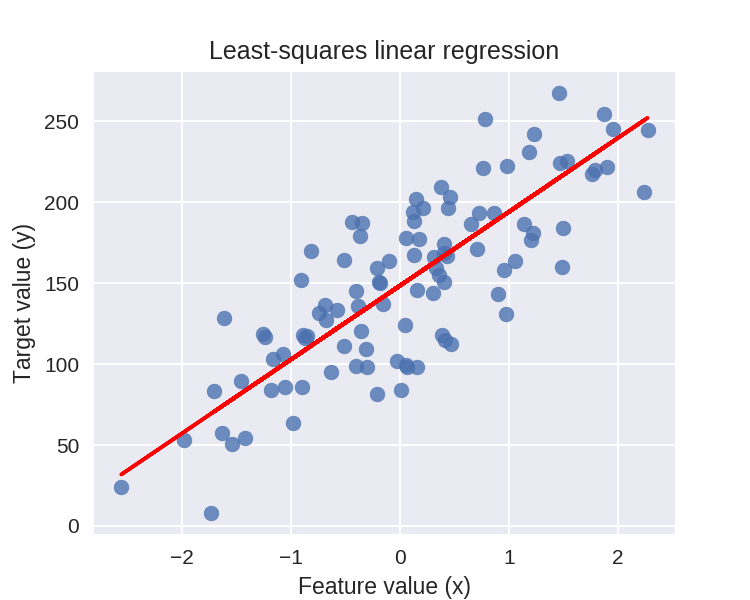

In [15]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306726048451
linear model coeff:
[  1.62e-03  -9.43e+01   1.36e+01  -3.13e+01  -8.15e-02  -1.69e+01
  -2.43e-03   1.53e+00  -1.39e-02  -7.72e+00   2.28e+01  -5.66e+00
   9.35e+00   2.07e-01  -7.43e+00   9.66e-03   4.38e-03   4.80e-03
  -4.46e+00  -1.61e+01   8.83e+00  -5.07e-01  -1.42e+00   8.18e+00
  -3.87e+00  -3.54e+00   4.49e+00   9.31e+00   1.74e+02   1.18e+01
   1.51e+02  -3.30e+02  -1.35e+02   6.95e-01  -2.38e+01   2.77e+00
   3.82e-01   4.39e+00  -1.06e+01  -4.92e-03   4.14e+01  -1.16e-03
   1.19e+00   1.75e+00  -3.68e+00   1.60e+00  -8.42e+00  -3.80e+01
   4.74e+01  -2.51e+01  -2.88e-01  -3.66e+01   1.90e+01  -4.53e+01
   6.83e+02   1.04e+02  -3.29e+02  -3.14e+01   2.74e+01   5.12e+00
   6.92e+01   1.98e-02  -6.12e-01   2.65e+01   1.01e+01  -1.59e+00
   2.24e+00   7.38e+00  -3.14e+01  -9.78e-05   5.02e-05  -3.48e-04
  -2.50e-04  -5.27e-01  -5.17e-01  -4.10e-01   1.16e-01   1.46e+00
  -3.04e-01   2.44e+00  -3.66e+01   1.41e-01   2.89

### Ridge regression

In [20]:
'''
In scikit learn, you use rich regression by importing the ridge class from sklearn.linear model. And then use that estimate or object just as you would for least-squares. The one difference is that you can specify the amount of the ridge regression regularisation penalty, which is called the L2 penalty, using the alpha parameter. Here, we're applying ridge regression to the crime data set. Now, you'll notice here that the results are not that impressive. The R-squared score on the test set is pretty comparable to what we got for least-squares regression.
'''

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))



Crime dataset
ridge regression linear model intercept: -3352.423035846206
ridge regression linear model coeff:
[  1.95e-03   2.19e+01   9.56e+00  -3.59e+01   6.36e+00  -1.97e+01
  -2.81e-03   1.66e+00  -6.61e-03  -6.95e+00   1.72e+01  -5.63e+00
   8.84e+00   6.79e-01  -7.34e+00   6.70e-03   9.79e-04   5.01e-03
  -4.90e+00  -1.79e+01   9.18e+00  -1.24e+00   1.22e+00   1.03e+01
  -3.78e+00  -3.73e+00   4.75e+00   8.43e+00   3.09e+01   1.19e+01
  -2.05e+00  -3.82e+01   1.85e+01   1.53e+00  -2.20e+01   2.46e+00
   3.29e-01   4.02e+00  -1.13e+01  -4.70e-03   4.27e+01  -1.23e-03
   1.41e+00   9.35e-01  -3.00e+00   1.12e+00  -1.82e+01  -1.55e+01
   2.42e+01  -1.32e+01  -4.20e-01  -3.60e+01   1.30e+01  -2.81e+01
   4.39e+01   3.87e+01  -6.46e+01  -1.64e+01   2.90e+01   4.15e+00
   5.34e+01   1.99e-02  -5.47e-01   1.24e+01   1.04e+01  -1.57e+00
   3.16e+00   8.78e+00  -2.95e+01  -2.33e-04   3.14e-04  -4.14e-04
  -1.80e-04  -5.74e-01  -5.18e-01  -4.21e-01   1.53e-01   1.33e+00
   3.85e+00   3.03

"\nIn scikit learn, you use rich regression by importing the ridge class from sklearn.linear model. And then use that estimate or object just as you would for least-squares. The one difference is that you can specify the amount of the ridge regression regularisation penalty, which is called the L2 penalty, using the alpha parameter. Here, we're applying ridge regression to the crime data set. Now, you'll notice here that the results are not that impressive. The R-squared score on the test set is pretty comparable to what we got for least-squares regression.\n"

#### Ridge regression with feature normalization

In [19]:
'''
However there is something we can do in applying ridge regression that will improve the results dramatically. So now is the time for a brief digression about the need for feature preprocessing and normalization. Let's stop and think for a moment intuitively, what ridge regression is doing. It's regularizing the linear regression by imposing that sum of squares penalty on the size of the W coefficients. So the effect of increasing alpha is to shrink the AW coefficients toward zero and towards each other. But if the input variables, the features, have very different scales, then when this shrinkage happens of the coefficients, input variables with different scales will have different contributions to this L2 penalty, because the L2 penalty is a sum of squares of all the coefficients. So transforming the input features, so they're all on the same scale, means the ridge penalty is in some sense applied more fairly to all features without unduly weighting some more than others, just because of the difference in scales.
'''

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

'''
You may have noticed two things here. First, that we're applying the same scalar object to both the training and the testing. And second, that we're training the scalar object on the training data and not on the test data. These are both critical aspects to feature normalization. If you don't apply the same scaling to training and test sets, you'll end up with more or less random data skew, which will invalidate your results. If you prepare the scaler or other normalization method by showing it the test data instead of the training data, this leads to a phenomenon called Data Leakage, where the training phase has information that is leaked from the test set. For example, like the distribution of extreme values for each feature in the test data, which the learner should never have access to during training. This in turn can cause the learning method to give unrealistically good estimates on the same test set. We'll look more at the phenomenon of data leakage later in the course. One downside to performing feature normalization is that the resulting model and the transformed features may be harder to interpret. Again, in the end, the type of feature normalization that's best to apply, can depend on the data set, learning task and learning algorithm to be used. We'll continue to touch on this issue throughout the course. 

Okay, let's return to ridge regression after we've added the code for minmax scaling of the input features. We can see the significant effect of minmax scaling on the performance of ridge regression. After the input features have been properly scaled, ridge regression achieves significantly better model fit with an R-squared value on the test set of about 0.6. Much better than without scaling, and much better now than ordinary least-squares. In fact if you apply the same minmax scaling with ordinary least-squares regression, you should find that it doesn't change the outcome at all. In general, regularisation works especially well when you have relatively small amounts of training data compared to the number of features in your model. 

'''

Crime dataset
ridge regression linear model intercept: 933.390638504416
ridge regression linear model coeff:
[  88.69   16.49  -50.3   -82.91  -65.9    -2.28   87.74  150.95   18.88
  -31.06  -43.14 -189.44   -4.53  107.98  -76.53    2.86   34.95   90.14
   52.46  -62.11  115.02    2.67    6.94   -5.67 -101.55  -36.91   -8.71
   29.12  171.26   99.37   75.07  123.64   95.24 -330.61 -442.3  -284.5
 -258.37   17.66 -101.71  110.65  523.14   24.82    4.87  -30.47   -3.52
   50.58   10.85   18.28   44.11   58.34   67.09  -57.94  116.14   53.81
   49.02   -7.62   55.14  -52.09  123.39   77.13   45.5   184.91  -91.36
    1.08  234.09   10.39   94.72  167.92  -25.14   -1.18   14.6    36.77
   53.2   -78.86   -5.9    26.05  115.15   68.74   68.29   16.53  -97.91
  205.2    75.97   61.38  -79.83   67.27   95.67  -11.88]
R-squared score (training): 0.615
R-squared score (test): 0.599
Number of non-zero features: 88


#### Ridge regression with regularization parameter: alpha

In [ ]:
'''
Regularisation becomes less important as the amount of training data you have increases. We can see the effect of varying the amount of regularisation on the scale to training and test data using different settings for alpha in this example. The best R-squared value on the test set is achieved with an alpha setting of around 20. Significantly larger or smaller values of alpha, both lead to significantly worse model fit. This is another illustration of the general relationship between model complexity and test set performance that we saw earlier in this lecture. Where there's often an intermediate best value of a model of complexity parameter that does not lead to either under or overfitting. Another kind of regularized regression that you could use instead of ridge regression is called Lasso Regression. 
'''

print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56



### Lasso regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

#### Lasso regression with regularization parameter: alpha

In [ ]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

### Polynomial regression

In [ ]:
'''
 So in practice, polynomial regression is often done with a regularized learning method like ridge regression. Here's an example of polynomial regression using scikit-learn. There's already a handy class called polynomial features in the sklearn.preprocessing module that will generate these polynomial features for us. This example shows three regressions on a more complex regression dataset, that happens to have some quadratic interactions between variables. The first regression here, just uses least-squares regression without the polynomial feature transformation. The second regression creates the polynomial features object with degrees set to two, and then calls the fit transform method of the polynomial features object on the original XF1 features, to produce the new polynomial transform features XF1 poly. The code then calls ordinary least-squares linear regression. You can see indications of overfitting on this expanded feature representation, as the models r-squared score on the training set is close to one but much lower on the test set. So the third regression shows the effect of adding regularisation via ridge regression on this expanded feature set. Now, the training and tests r-squared scores are basically the same, with the test set score of the regularized polynomial regression performing the best of all three regression methods. 
'''

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

## Linear models for classification

### Logistic regression

#### Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)

In [ ]:
'''
We're now going to look at a second supervised learning method that in spite of being called a regression measure, is actually used for classification and it’s called logistic regression. 

Logistic regression can be seen as a kind of generalized linear model. 
And like ordinary least squares and other regression methods, logistic regression takes a set input variables, the features, and estimates a target value. 
However, unlike ordinary linear regression, in it's most basic form logistic repressions target value is a binary variable instead of a continuous value. 
There are flavors of logistic regression that can also be used in cases where the target value to be predicted is a multi class categorical variable, not just binary. But for now we'll focus on the simple binary case of logistic regression. 
'''


In [ ]:
'''
Let's look at an example with real data in Scikit-Learn. To perform logistic, regression in Scikit-Learn, you import the logistic regression class from the sklearn.linear model module, then create the object and call the fit method using the training data just as you did for other class files like k nearest neighbors. 

Here, the code also sets a parameter c to 100, which we'll explain in a minute. 
The data set we're using here is a modified form of our fruits data set, using only height and width as the features, the features space, and with the target class value modified into a binary classification problem predicting whether an object is an apple, a positive class, or something other than an apple, a negative class. 
'''
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Logistic regression on simple synthetic dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
     

#### Logistic regression regularization: C parameter

In [ ]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

#### Application to real dataset

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### Support Vector Machines

#### Linear Support Vector Machine

In [3]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

ModuleNotFoundError: No module named 'adspy_shared_utilities'

#### Linear Support Vector Machine: C parameter

In [ ]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

#### Application to real dataset

In [4]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

NameError: name 'X_cancer' is not defined

### Multi-class classification with linear models

#### LinearSVC with M classes generates M one vs rest classifiers.

In [ ]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

#### Multi-class results on the fruit dataset

In [ ]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

## Kernelized Support Vector Machines

### Classification

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

#### Support Vector Machine with RBF kernel: gamma parameter

In [ ]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

#### Support Vector Machine with RBF kernel: using both C and gamma parameter 

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Application of SVMs to a real dataset: unnormalized data

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

## Cross-validation

### Example based on k-NN classifier with fruit dataset (2 features)

In [ ]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

### A note on performing cross-validation for more advanced scenarios.

In some cases (e.g. when feature values have very different ranges), we've seen the need to scale or normalize the training and test sets before use with a classifier. The proper way to do cross-validation when you need to scale the data is *not* to scale the entire dataset with a single transform, since this will indirectly leak information into the training data about the whole dataset, including the test data (see the lecture on data leakage later in the course).  Instead, scaling/normalizing must be computed and applied for each cross-validation fold separately.  To do this, the easiest way in scikit-learn is to use *pipelines*.  While these are beyond the scope of this course, further information is available in the scikit-learn documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

or the Pipeline section in the recommended textbook: Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O'Reilly Media).

## Validation curve example

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

NameError: name 'X' is not defined

In [ ]:
print(train_scores)

In [ ]:
print(test_scores)

In [ ]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## Decision Trees

In [ ]:
'''
 For example, we're going to look at a classification task next that involves finding rules that can predict what species a particular flower is, based on measurements of certain parts of the flower. Rather than try to figure out these rules manually for every task, there are supervised algorithms that can learn them for us in a way that gets to an accurate decision quickly, which we'll look at now. Let's start by looking at a famous dataset in machine learning called the iris dataset. This dataset is included with scikit-learn in the datasets module. Each instance in the dataset represents one of three different species of Iris, a type of flower. There are four attributes or features for each instance, that represent measurements of different parts of the flower. The sepal length in centimeters, the sepal width in centimeters, petal length in centimeters and petal width in centimeters. The three species are called setosa, the versicolor and virginica. The data set has measurements for 150 flowers with 50 examples of each species. The classification task is to predict which of the three species and instances given these measurements. Unlike our simple example involving yes or no questions which were binary features of the object. The iris data sets features are continuous values. So the rules to be learned will be of the form for example, "Is Petal length greater than 2.3 centimeters?"
'''

In [36]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split
from sklearn import tree


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


#### Setting max decision tree depth to help avoid overfitting

In [37]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


In [38]:
import graphviz


#### Visualizing decision trees

In [39]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)
#tree.plot_tree(clf)

FileNotFoundError: [Errno 2] No such file or directory: 'readonly/adspy_temp.dot'

In [40]:
#plotting
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

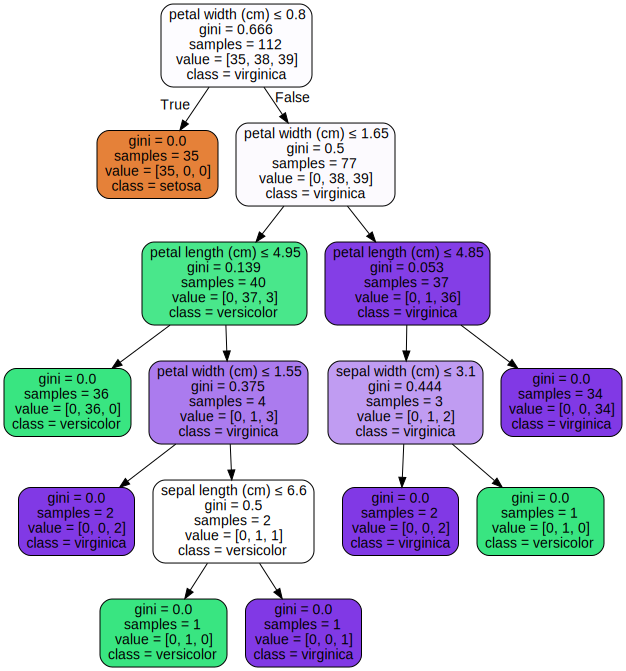

In [30]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### Pre-pruned version (max_depth = 3)

In [35]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

FileNotFoundError: [Errno 2] No such file or directory: 'readonly/adspy_temp.dot'

#### Feature importance

In [ ]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

#### Decision Trees on a real-world dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

In [ ]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()